## 1. Difference between K-Means and Hierarchical Clustering
K-Means partitions data into a fixed number of clusters by minimizing intra-cluster variance and works well for large datasets. Hierarchical clustering builds a tree-like structure of clusters and is useful when the number of clusters is unknown or data size is small.

## 2. Purpose of the Silhouette Score
The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters, helping evaluate clustering quality.

## 3. Core parameters of DBSCAN
DBSCAN uses eps (neighborhood radius) and min_samples (minimum points to form a cluster). These parameters control cluster density and noise detection.

## 4. Importance of Feature Scaling in Clustering
Clustering algorithms rely on distance calculations, so feature scaling ensures that all features contribute equally to distance measures.

## 5. Elbow Method in K-Means
The Elbow Method plots inertia versus number of clusters to identify a point where adding more clusters yields diminishing returns.

## 6. KMeans Clustering on Synthetic Data

C:\Users\karka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


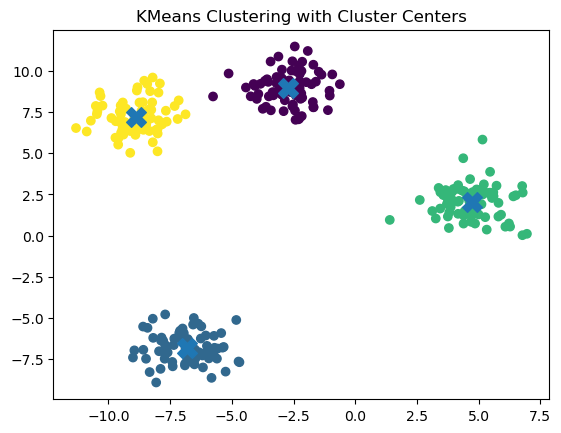

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, marker='X')
plt.title("KMeans Clustering with Cluster Centers")
plt.show()


## 7. DBSCAN on Wine Dataset

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, _ = load_wine(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", n_clusters)


Number of clusters found: 0


## 8. DBSCAN on Moon-shaped Data

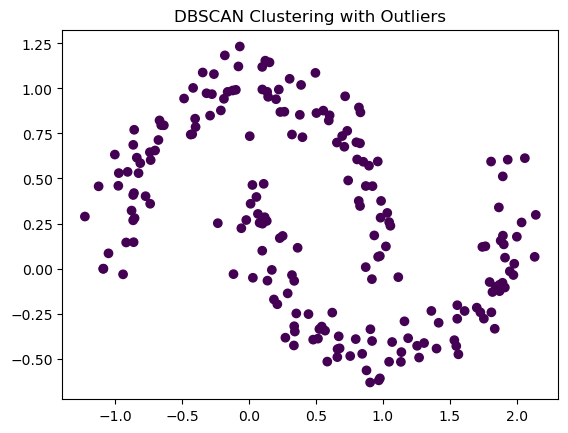

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN Clustering with Outliers")
plt.show()


## 9. Agglomerative Clustering after PCA (Wine Dataset)

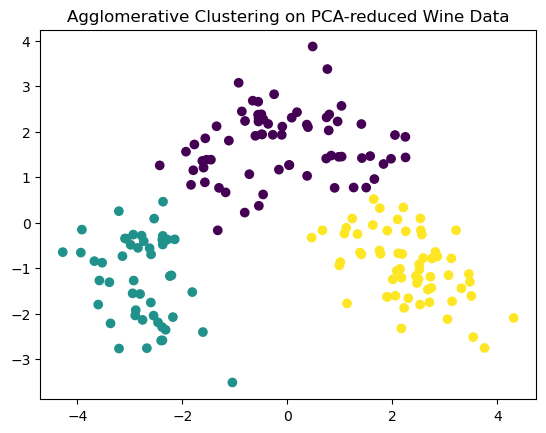

In [4]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, _ = load_wine(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Agglomerative Clustering on PCA-reduced Wine Data")
plt.show()



## 10. Customer Segmentation using Clustering (E-commerce Case Study)

1.Which clustering algorithm(s) would you use and why?
ANS:K-Means would be used as the primary algorithm because it is efficient and works well on large customer datasets with clear segment patterns. DBSCAN can be used additionally to identify outliers such as one-time buyers or abnormal purchasing behavior. Hierarchical clustering may be applied during exploratory analysis to understand relationships between customer segments.


2.How would you preprocess the data (missing values, scaling)?
ANS:Missing numerical values would be handled using median imputation, while categorical missing values would be filled using the most frequent category. Feature scaling using StandardScaler is essential to ensure all variables contribute equally to distance calculations used in clustering algorithms.



3.How would you determine the number of clusters?
ANS:The Elbow Method would be used to identify the point where adding more clusters does not significantly reduce inertia. The Silhouette Score would further validate the quality of clustering by measuring how well customers fit within their assigned clusters.



4.How would the marketing team benefit from your clustering analysis?
ANS:Clustering enables the marketing team to design targeted promotions based on customer behavior, such as loyalty offers for high-value customers or discounts for price-sensitive groups. This leads to improved personalization, higher conversion rates, better customer retention, and optimized marketing spend.




